In [1]:
# DATA MANIPULATION
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import Sequential, Input, layers, regularizers

# How to Properly Prevent Overfit

## Data - the blobs Dataset

In [2]:
X, y = make_blobs(n_samples=2000, n_features=10, centers=8, cluster_std=7)

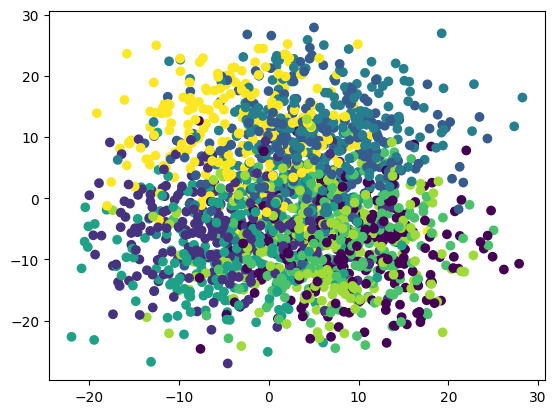

In [4]:
plt.scatter(X.T[0], X.T[1], c=y)
plt.show()

## Encoding the categorical target

In [6]:
y_cat = to_categorical(y)
print(y)
print(y_cat)

[7 3 3 ... 0 5 4]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## (1) Cross-Validation in Deep Learning

### Designing a NN

In [9]:
def initialize_model():
    model = Sequential()
    model.add(Input(shape=(10, )))
    model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

### Cross-Validating the Neural Network

In [10]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

results = []

for train_index, test_index in kf.split(X):
    # Split the data into train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_cat[train_index], y_cat[test_index]

    # Scale the data
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the model
    model = initialize_model()

    # Fit the model on the training data
    model.fit(X_train_scaled, y_train, epochs=150, batch_size=16, verbose=0)

    # Evaluate the model on the testing data
    res = model.evaluate(X_test_scaled, y_test, verbose=0)
    results.append(res)

# Performance of the Cross-Validated Network
accuracy = [_[1] for _ in results]

print(f'New mean accuracy: {np.mean(accuracy)*100:.2f}% (±{np.std(accuracy)*100:.2f})')

New mean accuracy: 82.35% (±2.31)


### Holdout Method

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 10), (600, 10), (1400, 8), (600, 8))

In [13]:
# Make sure to also scale the data after splitting
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## (2) How to Prevent a NN from Overfitting

### (2.1) Early Stopping

In [14]:
# Stop the learning process before overfitting
model = initialize_model()

history = model.fit(X_train_scaled, y_train, validation_split=0.3, shuffle=True, epochs=500, batch_size=16, verbose=0)

results = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f'The accuracy on the test set is of {results[1]:.2f}')

The accuracy on the test set is of 0.77


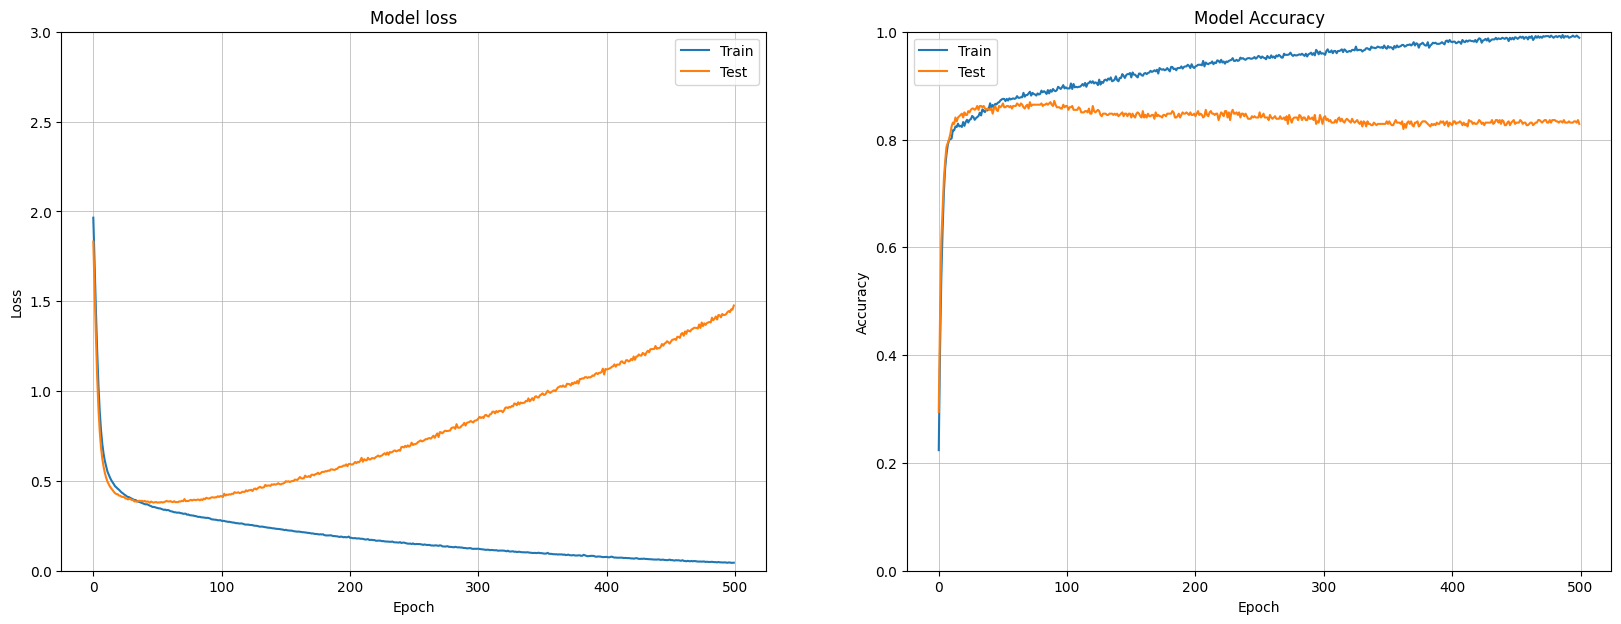

In [15]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))

    # --- LOSS ---

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    ax[0].set_ylim((0,3))

    ax[0].legend(['Train', 'Test'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'Test'], loc='best')

    ax[1].set_ylim((0,1))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

plot_loss_accuracy(history)

Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1685 - loss: 2.0533 - val_accuracy: 0.3088 - val_loss: 1.9077
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3626 - loss: 1.8418 - val_accuracy: 0.4466 - val_loss: 1.6722
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4270 - loss: 1.6336 - val_accuracy: 0.5131 - val_loss: 1.4610
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4934 - loss: 1.4329 - val_accuracy: 0.5867 - val_loss: 1.2668
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5679 - loss: 1.2400 - val_accuracy: 0.6366 - val_loss: 1.0847
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6404 - loss: 1.0651 - val_accuracy: 0.7078 - val_loss: 0.9224
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.9147 - val_accuracy: 0.7530 - val_loss: 0.7929
Epoch 8/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7528 - loss: 0.7927 - val_accuracy: 0.7933 - v

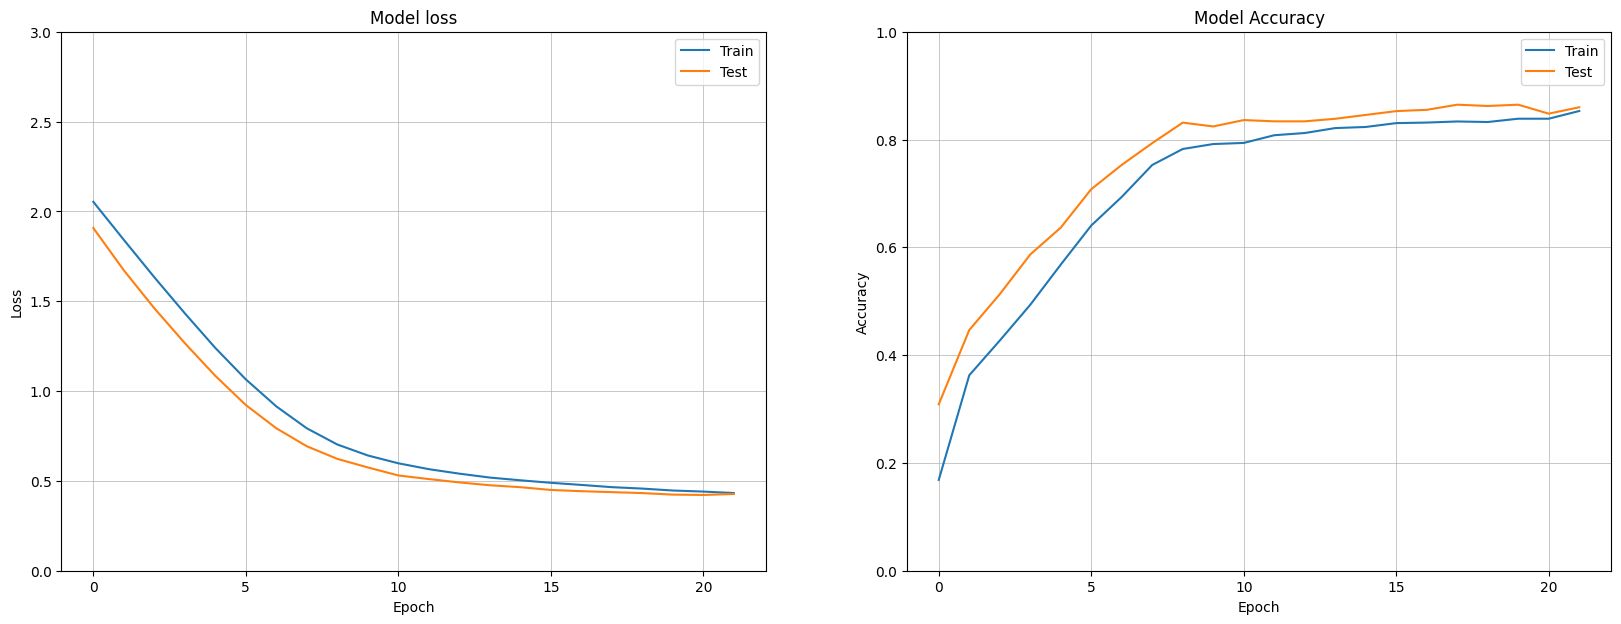

In [16]:
es = EarlyStopping()

model = initialize_model()

history = model.fit(X_train_scaled, y_train, validation_split=0.3, epochs=500, batch_size=16, verbose=1,
                    callbacks=[es] # This will call the Early Stopping Criterion for each epoch
                    )

results = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')
plot_loss_accuracy(history)

In [17]:
history.history

{'accuracy': [0.16853933036327362,
  0.3626148998737335,
  0.42696627974510193,
  0.49336057901382446,
  0.5679264664649963,
  0.6404494643211365,
  0.6935648918151855,
  0.7528089880943298,
  0.7824310660362244,
  0.791624128818512,
  0.7936670184135437,
  0.8079673051834106,
  0.8120531439781189,
  0.8212461471557617,
  0.8232890963554382,
  0.8304392099380493,
  0.8314606547355652,
  0.8335036039352417,
  0.832482099533081,
  0.838610827922821,
  0.838610827922821,
  0.852911114692688],
 'loss': [2.053256034851074,
  1.8418095111846924,
  1.6336208581924438,
  1.4328944683074951,
  1.240002989768982,
  1.0651320219039917,
  0.914740264415741,
  0.7927026152610779,
  0.7025743722915649,
  0.6415359377861023,
  0.5979716777801514,
  0.5653242468833923,
  0.5402541160583496,
  0.5185002684593201,
  0.50333172082901,
  0.48939815163612366,
  0.47758495807647705,
  0.46514490246772766,
  0.4571026563644409,
  0.4464503526687622,
  0.4405106008052826,
  0.4324251115322113],
 'val_accuracy

The accuracy on the test set is of 0.82


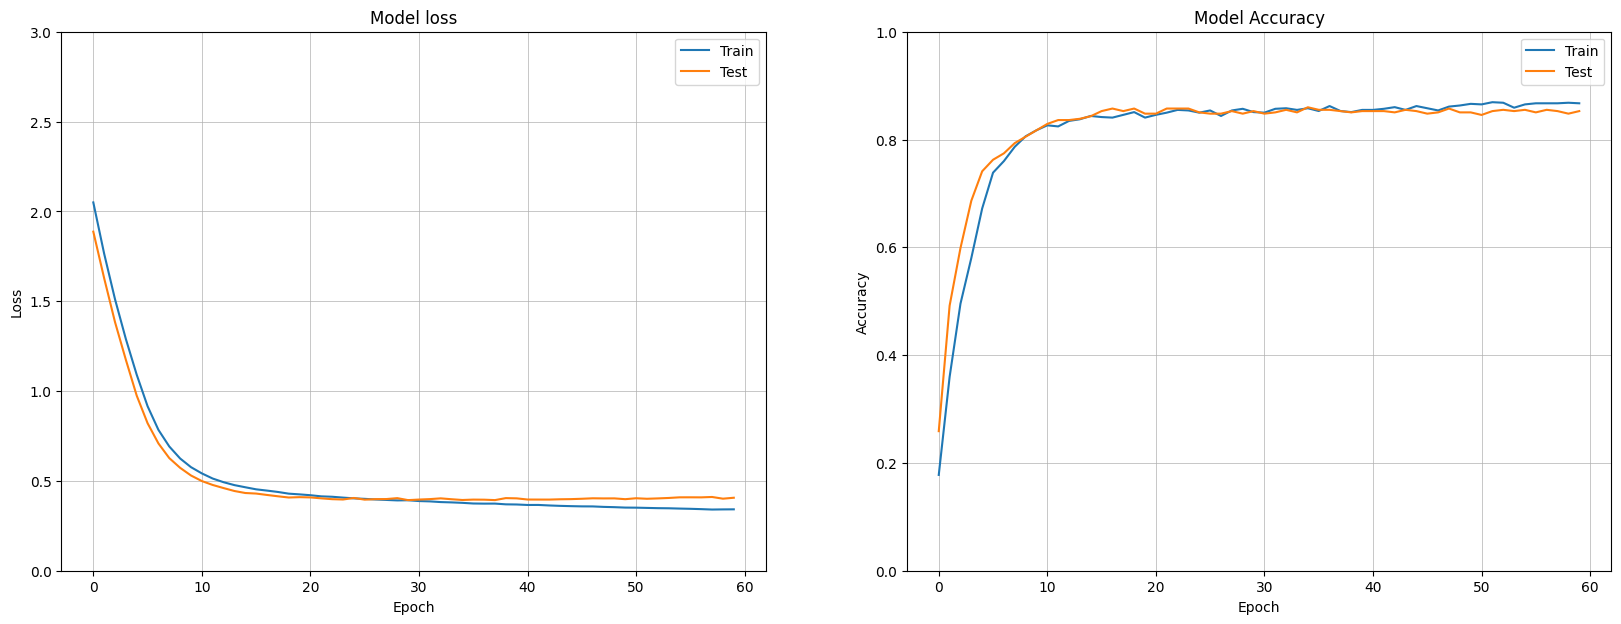

In [18]:
model = initialize_model()

es = EarlyStopping(patience=30)

# Fitting the model and saving the training into a history variable
history = model.fit(X_train_scaled, y_train, validation_split=0.3, epochs=500, batch_size=16, verbose=0,
                    callbacks=[es]
)

# Observing the loss and the metrics w.r.t. epochs
plot_loss_accuracy(history)

# Evaluating the model on the testing set
results = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')

The accuracy on the test set is of 0.84


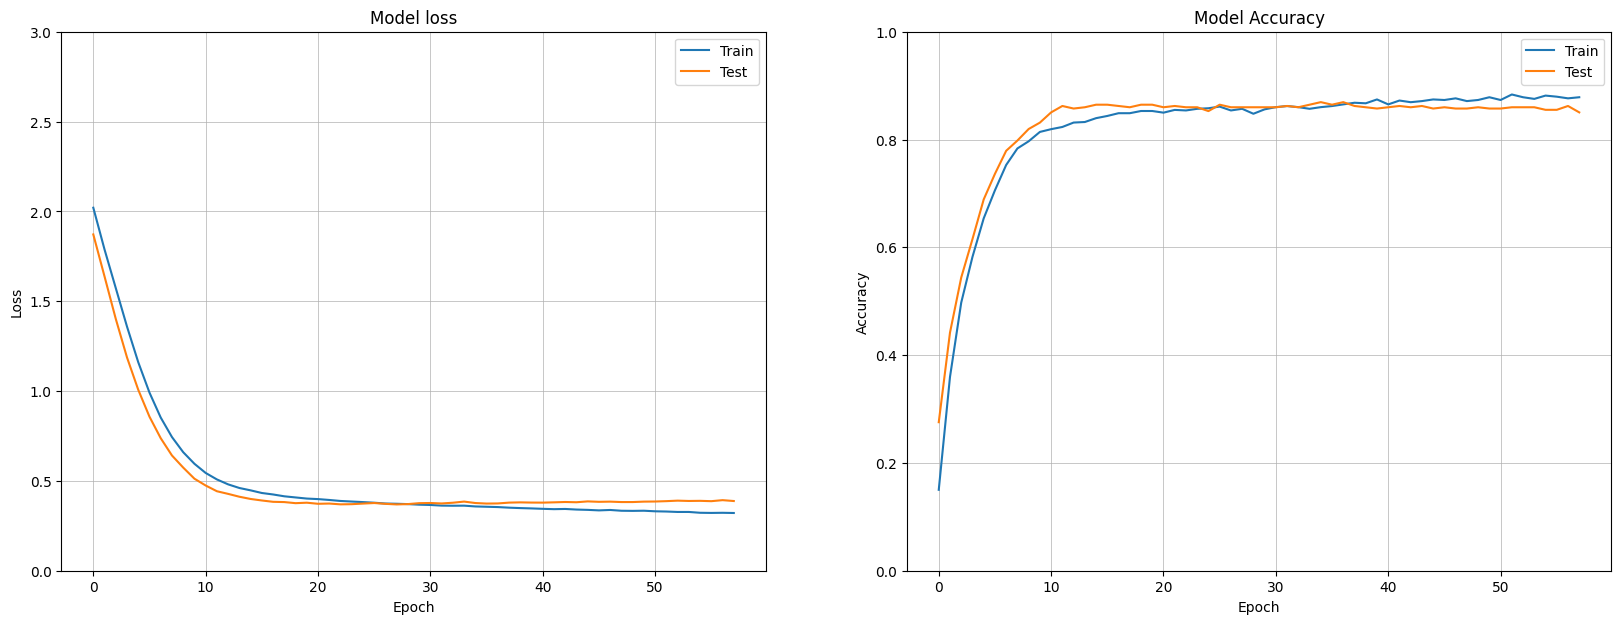

In [19]:
# Restoring the Best Weights of a Model

model = initialize_model()

es = EarlyStopping(patience=30, restore_best_weights=True)

# Fitting the model and saving the training into a history variable
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.3,
    epochs=500,
    batch_size=16,
    verbose=0,
    callbacks=[es]
)

# Observing the loss and the metrics w.r.t. epochs
plot_loss_accuracy(history)

# Evaluating the model on the testing set
results = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')

### (2.2) Batch Size & Epochs 

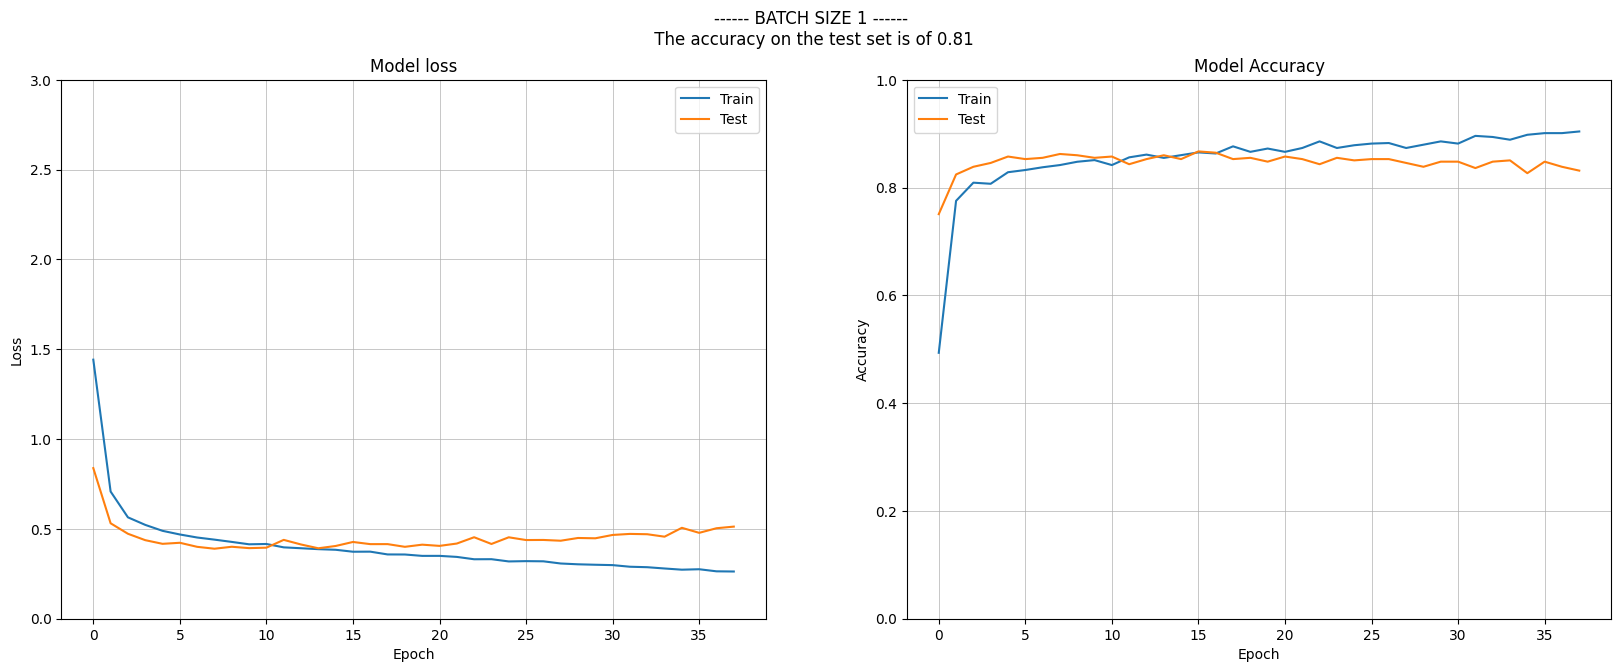

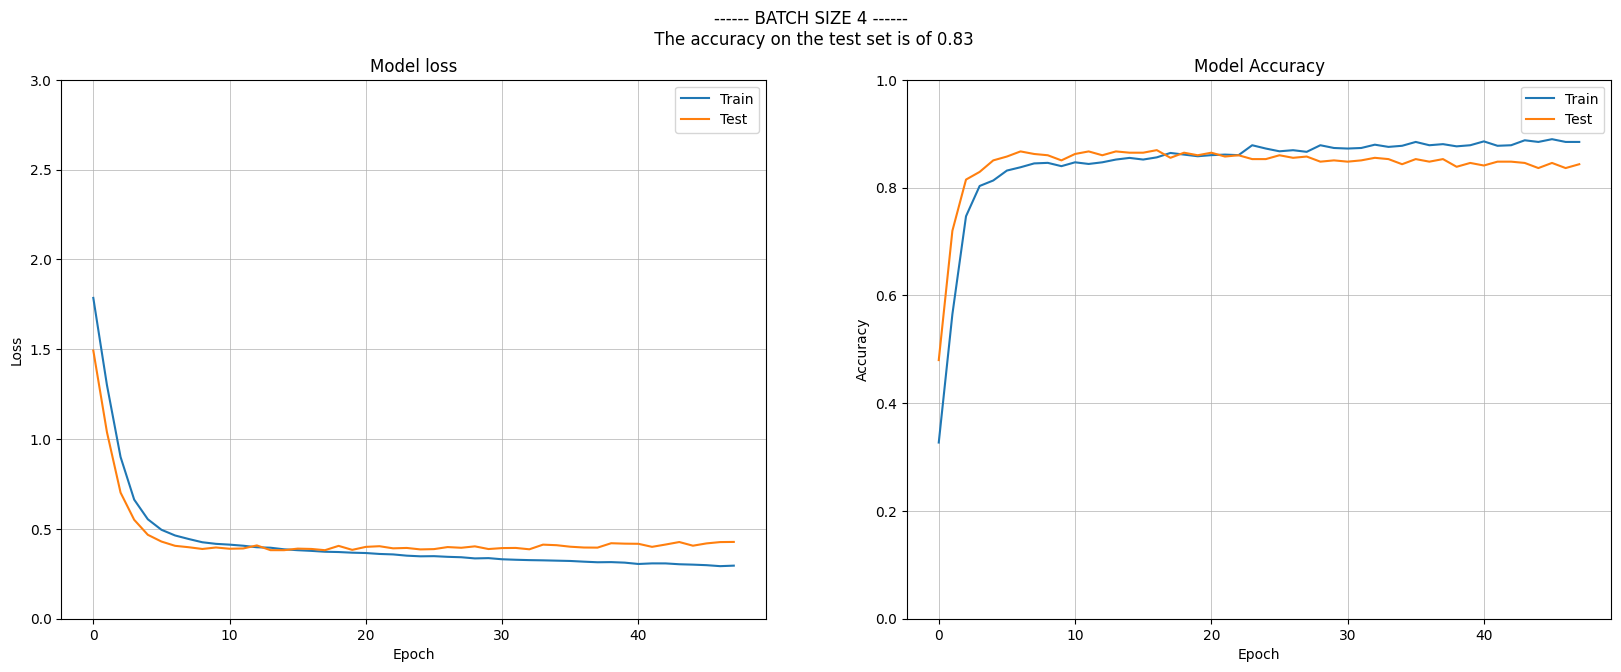

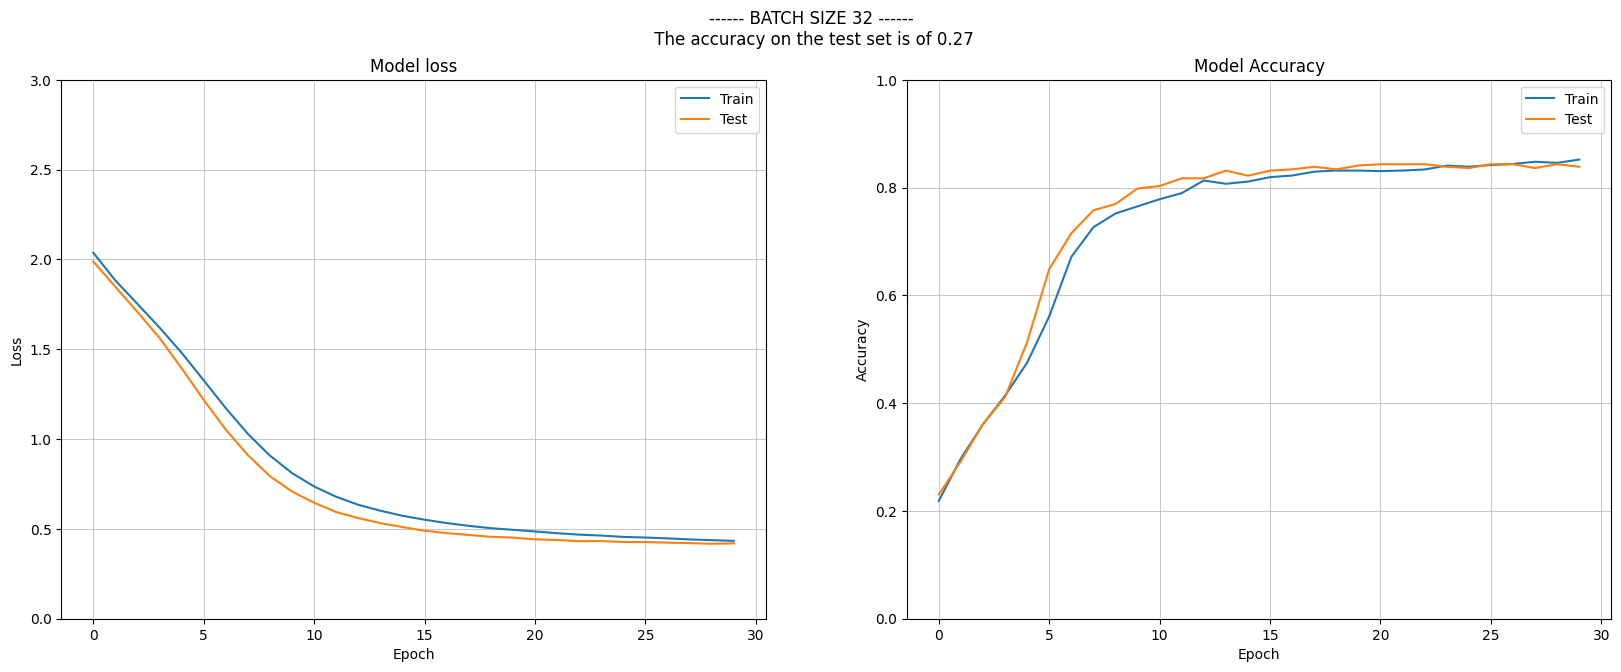

In [23]:
es = EarlyStopping(patience=30, restore_best_weights=True)

for batch_size in [1, 4, 32]:

    model = initialize_model()

    history = model.fit(
        X_train_scaled,
        y_train,
        validation_split=0.3,
        epochs=500,
        batch_size=batch_size,
        verbose=0,
        callbacks=[es]
    )

    results = model.evaluate(X_test_scaled, y_test, verbose=0)
    plot_loss_accuracy(history, title=f'------ BATCH SIZE {batch_size} ------\n The accuracy on the test set is of {results[1]:.2f}')

### (2.3) Regularization

The accuracy on the testing set is 0.81...
...whereas the accuracy on the training set is 0.92!


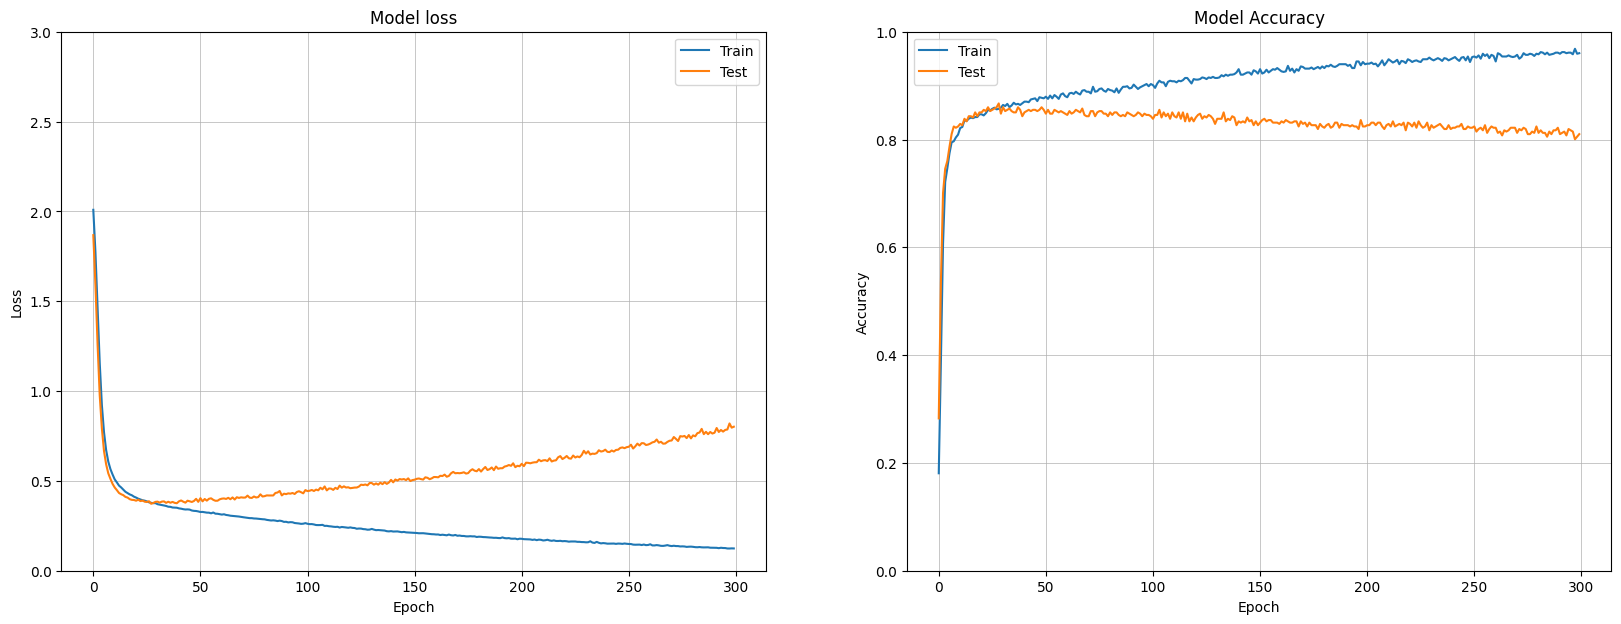

In [24]:
# 1. Model Architecture
model = Sequential()
model.add(Input(shape=(10,)))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

# 2. Model Compilation
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 3. Training
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.3,
    epochs=300,           # Notice that we are not using any Early Stopping Criterion
    batch_size=16,
    verbose=0
)

# 4. Evaluation
results_train = model.evaluate(X_train_scaled, y_train, verbose=0)
results_test = model.evaluate(X_test_scaled, y_test, verbose=0)


# 5. Looking back at what happened during the training phase
print(f'The accuracy on the testing set is {results_test[1]:.2f}...')
print(f'...whereas the accuracy on the training set is {results_train[1]:.2f}!')
plot_loss_accuracy(history)

Now, the accuracy on the testing set is 0.82...
...and the accuracy on the training set is 0.85!
The difference between the test accuracy and the train accuracy is much smaller when you regularize a Neural Network that used to overfit!


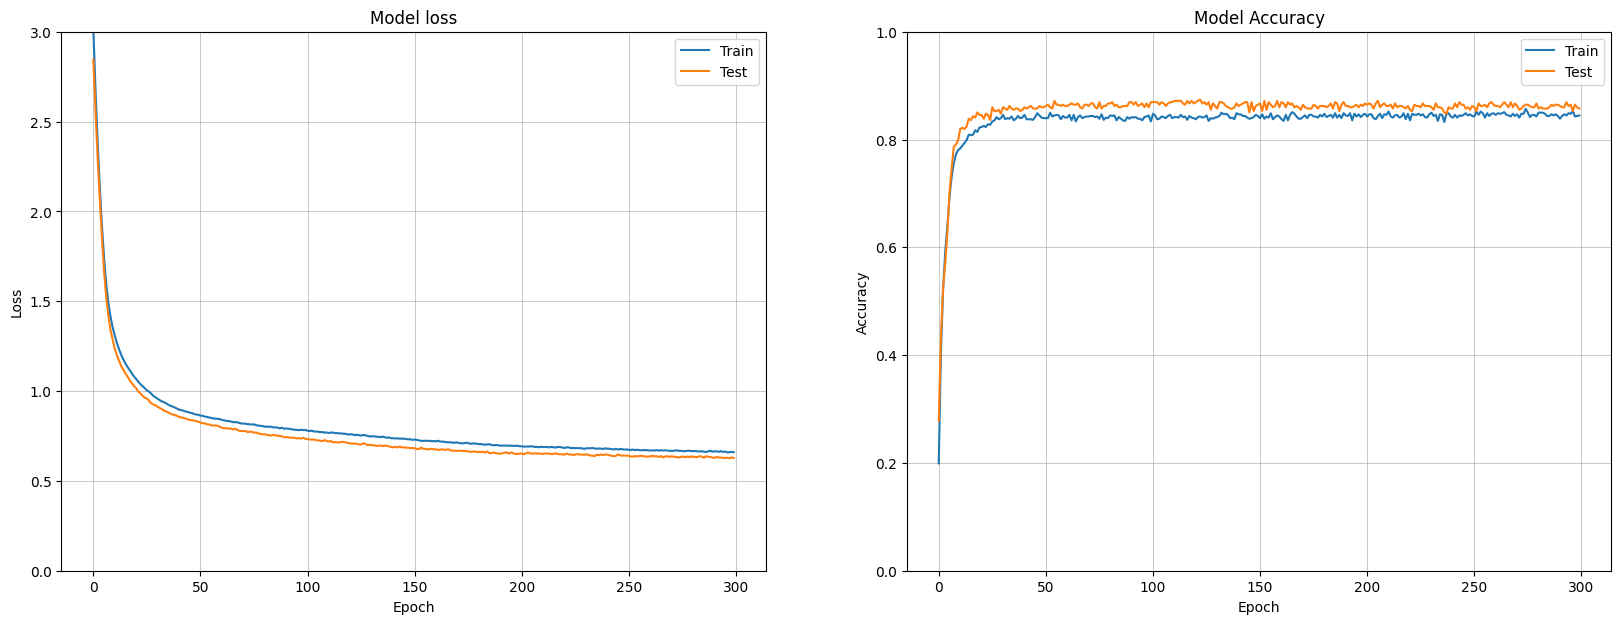

In [25]:
# 0. Kernel Regularization
reg_l1 = regularizers.L1(0.01)

# 1. Model Architecture
model = Sequential()
model.add(Input(shape=(10,)))
model.add(layers.Dense(25, activation='relu', kernel_regularizer=reg_l1))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=reg_l1))
model.add(layers.Dense(8, activation='softmax'))

# 2. Model compilation
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 3. Training
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.3,
    epochs=300,
    batch_size=16,
    verbose=0
)

# 4. Evaluation
results_train = model.evaluate(X_train_scaled, y_train, verbose=0)
results_test = model.evaluate(X_test_scaled, y_test, verbose=0)

# 5. Looking back at what happened during the training phase
print(f'Now, the accuracy on the testing set is {results_test[1]:.2f}...')
print(f'...and the accuracy on the training set is {results_train[1]:.2f}!')
print(f'The difference between the test accuracy and the train accuracy is much smaller when you regularize a Neural Network that used to overfit!')

plot_loss_accuracy(history)

### (2.4) Dropout Layers

Now, the accuracy on the test set is 0.81...
...and the accuracy on the training set is 0.86!
The difference between the test accuracy and the train accuracy is much smaller when you incorporate Dropout layers in the Neural Network !


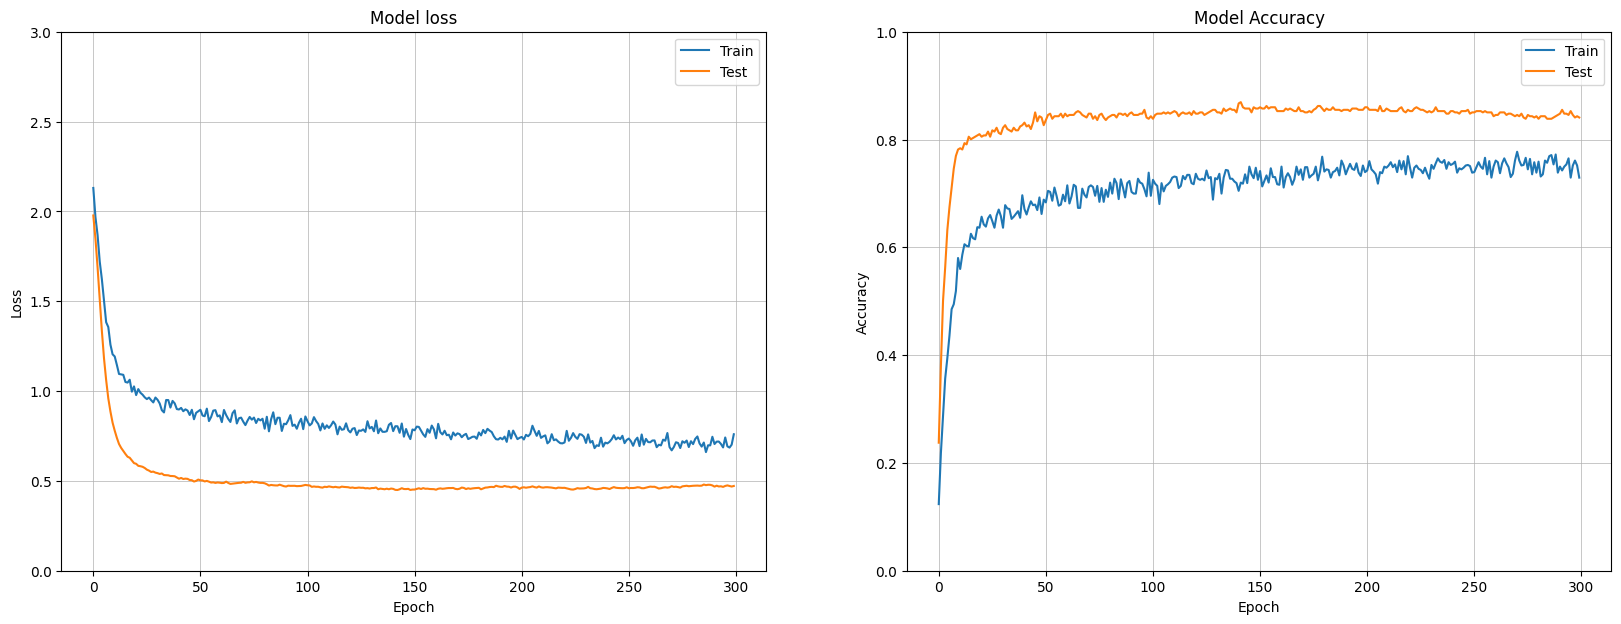

In [26]:
# 1. Model Architecture including Dropout Layers
model = Sequential()
model.add(Input(shape=(10,)))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8, activation='softmax'))

# 2. Model compilation
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 3. Training
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.3,
    epochs=300,
    batch_size=16,
    verbose=0
)

# 4. Evaluation
results_train = model.evaluate(X_train_scaled, y_train, verbose=0)
results_test = model.evaluate(X_test_scaled, y_test, verbose=0)


# 5. Looking back at what happened during the training phase
print(f'Now, the accuracy on the test set is {results_test[1]:.2f}...')
print(f'...and the accuracy on the training set is {results_train[1]:.2f}!')
print(f'The difference between the test accuracy and the train accuracy is much smaller when you incorporate Dropout layers in the Neural Network !')

plot_loss_accuracy(history)